In [1]:
from ds_utils.ds_preamble import *
from ds_utils.ds_plotting import *
from ds_utils.ds_helper import *
import datetime
import duckdb

calling ds_preamble..
calling ds_helper...


,Group,ID number,Department,mid,a1,a2,exam_A1,exam_A2,exam_A3,exam_B
0,201,20186978A,8C112-IT,42.0,31,10.0,6.0,4.0,15.0,10.0
1,201,20062656A,8C112-IT,84.0,84,82.0,12.0,6.0,8.0,19.0
2,201,20070054A,8C112-IT,48.0,84,52.0,14.0,10.0,17.0,9.0
3,201,20158549A,8C112-IT,68.0,93,61.0,17.0,14.0,12.0,36.0
4,201,20195428A,8C112-IT,90.0,88,80.0,17.0,14.0,16.0,18.0
...,...,...,...,...,...,...,...,...,...,...
260,203,20164396A,8C112-IT,86.0,95,90.0,1.0,0.0,8.0,17.0
261,203,20021940A,8C112-IT,74.0,82,83.0,14.0,0.0,16.0,13.0
262,203,19060186A,8C112-IT,82.0,95,99.0,14.0,0.0,20.0,13.0
263,203,20191141A,8C112-IT,48.0,70,47.0,7.0,0.0,10.0,11.0


,Group,Department,asm,score
0,201,8C112-IT,mid,42.0
1,201,8C112-IT,mid,84.0
2,201,8C112-IT,mid,48.0
3,201,8C112-IT,mid,68.0
4,201,8C112-IT,mid,90.0
...,...,...,...,...
790,203,8C112-IT,a2,90.0
791,203,8C112-IT,a2,83.0
792,203,8C112-IT,a2,99.0
793,203,8C112-IT,a2,47.0


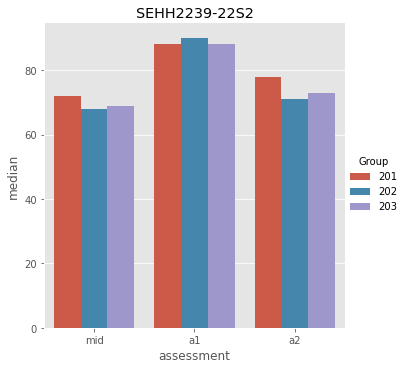

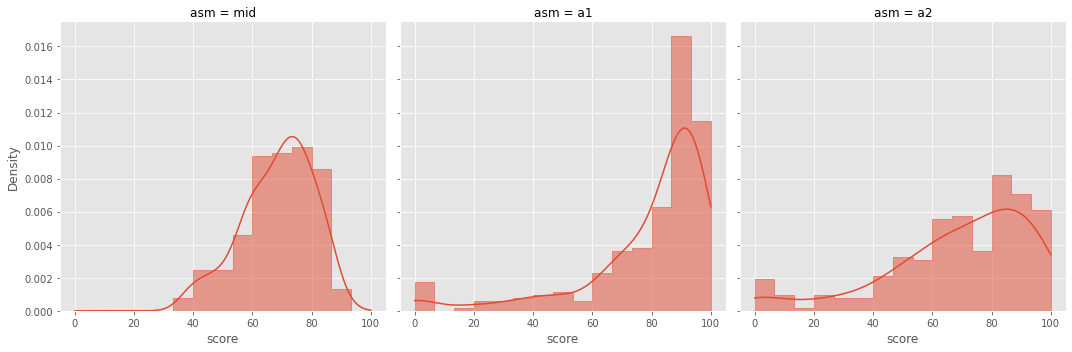

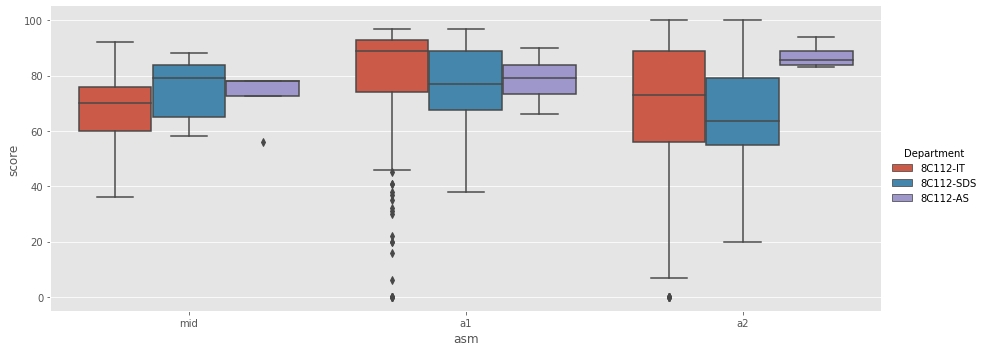

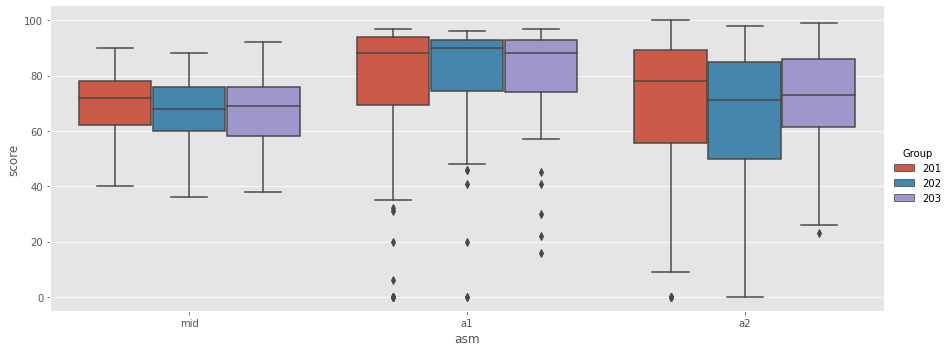

In [2]:
path = r'/Users/whlin/Library/CloudStorage/OneDrive-HKUSTConnect/Academic/Notes of HKCC/HKCC Teaching/SEHH2239/AR/SEHH2239 AR 201_all_class.xlsx'
df = pd.read_excel(path, sheet_name='score_all', usecols='A:J')
df
# df.groupby('Group').agg(['mean','median','max'])

# sns.barplot(data=df, x='')

df_melt = df.melt(id_vars=['Group', 'Department'], value_vars=['mid','a1','a2'], var_name='asm', value_name='score')

df_melt

sns.catplot(data=df_melt, x='asm', y='score', hue='Group', estimator=np.median, kind='bar', ci=None).set(title='SEHH2239-22S2', xlabel='assessment', ylabel='median')

# sns.catplot(data=df.melt(id_vars=['Group', 'Department'], value_vars=['mid','a1','a2']), x='variable',y='value', hue='Department', estimator=np.median, kind='bar', ci=None).set(title='SEHH2239-22S2', xlabel='assessment', ylabel='median')

# sns.displot(data=df_melt, x='score',col='asm',kind='hist')
sns.displot(data=df_melt, x='score', col='asm', col_wrap=3, kind='hist', stat='density', kde=True, element='step', bins=15)


sns.catplot(data=df_melt, x='asm', y='score', hue='Department', kind='box', aspect=2.5)
sns.catplot(data=df_melt, x='asm', y='score', hue='Group', kind='box', aspect=2.5)

In [3]:
df['exam_sum'] = df.filter(regex=r'exam_.*').sum(axis=1)

In [4]:
# df.groupby('Group')[['exam_A1','exam_A2','exam_A3','exam_B']].mean()
# df.groupby('Group')[df.columns[df.columns.str.contains(r'exam_.*')]].agg(['mean','median','max','min']).T.swaplevel(1,0).sort_index()

df.groupby('Group')[df.columns[df.columns.str.contains(r'exam_.*')]].mean()

# df[df.columns[df.columns.str.contains(r'exam_.*')]].describe()

,exam_A1,exam_A2,exam_A3,exam_B,exam_sum
Group,,,,,
201,12.375000,10.028846,12.750000,12.692308,46.943396
202,12.345794,8.074766,11.607477,10.700935,42.728972
203,12.019231,0.000000,11.769231,11.192308,34.980769


In [20]:
threshold=40
fail_rate = df.query('Group == 201').exam_sum.lt(threshold).values_counts_plus()
fail_rate

# df.groupby('Group').exam_sum.lt(threshold).value_counts_plus()
# threshold=34
# df.query('Group == 202').exam_sum.lt(threshold).value_counts_plus()

AttributeError: 'Series' object has no attribute 'values_counts_plus'

In [106]:

df.columns[df.columns.str.contains(r'exam_.*')]

Index(['exam_A1', 'exam_A2', 'exam_A3', 'exam_B', 'exam_sum'], dtype='object')

/Users/whlin/miniforge3/envs/data_science/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/whlin/miniforge3/envs/data_science/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='asm', ylabel='score'>

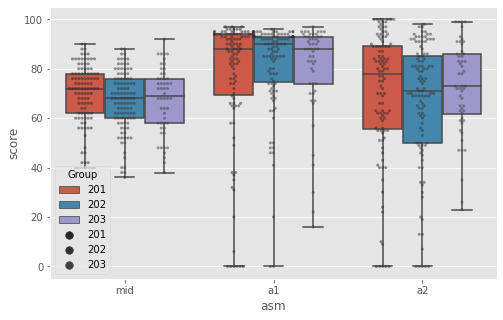

<Figure size 432x360 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'correlation')

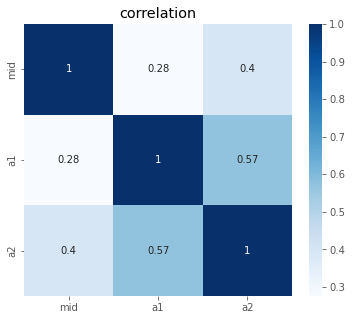

In [51]:
plt.figure(figsize=(6,5))
sns.heatmap(df.drop('Group',axis=1).corr(), annot=True,cmap="Blues")
plt.title("correlation")

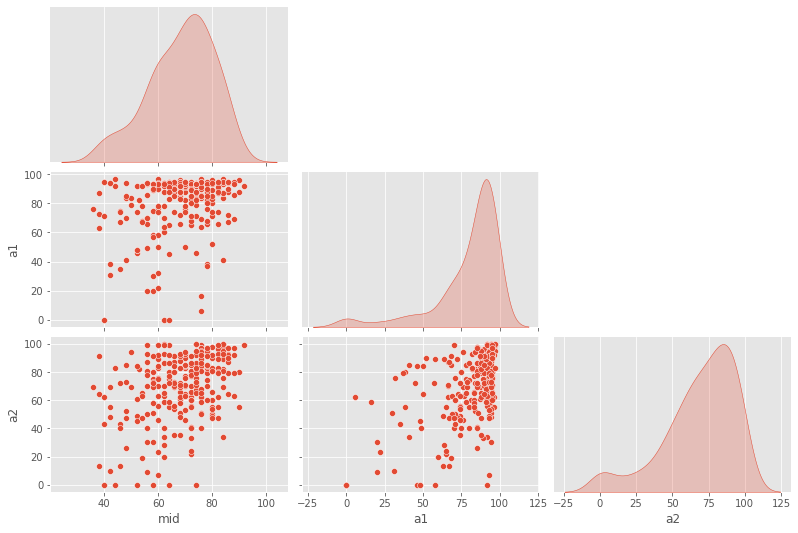

In [57]:
# sns.pairplot(df, hue='program', diag_kind="hist", corner=True)
# sns.pairplot(df, hue='program', diag_kind="kde", corner=True)
sns.pairplot(df.drop('Group',axis=1), diag_kind="kde", corner=True, aspect=1.5)

<AxesSubplot:xlabel='Group', ylabel='count'>

            size
Department      
8C112-AS       4
8C112-IT     247
8C112-SDS     14


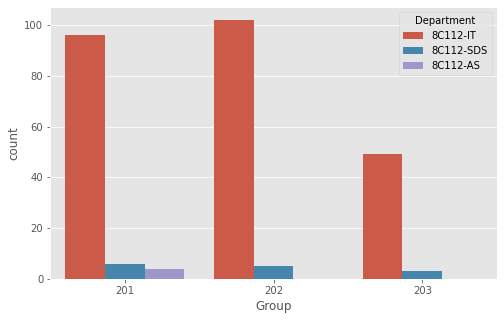

In [63]:
sns.countplot(data=df, x='Group', hue='Department')

print(df.groupby('Department').Group.agg(['size']))